# Implementación de Estrategia: Cruce de Medias Móviles

---

## Objetivo del Notebook

Este notebook implementa una estrategia de trading técnica basada en el cruce de medias móviles (*Moving Average Crossover*), utilizando como activo el par **BTC/USDT**. El objetivo es detectar señales de entrada (compra) y salida (venta) a partir del análisis de tendencias de corto y largo plazo.

---

##  Carga de datos

Se cargan los datos de precios desde un archivo `.csv` previamente enriquecido con indicadores técnicos (`btc_features.csv`). Se convierte la columna `date` en el índice del DataFrame, con formato de fecha:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from modules.backtesting_utils import detectar_cruces

In [2]:
btc_data = pd.read_csv('btc_data_features.csv', index_col='date', parse_dates=True)
btc_data.head()

,open,high,low,close,Volume BTC,Volume USDT,SMA_30,SMA_70,EMA_30,RSI,BOLL_UP_20,BOLL_DOWN_20,ATR_14,log_return,volatility_14,momentum_10,dist_close_to_SMA_30,dist_close_to_BOLL_UP_20
date,,,,,,,,,,,,,,,,,,
2024-01-20,41672.0,41823.0,41493.0,41693.0,6.842462,2.852828e+05,NaN,NaN,41693.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-21,41722.0,41855.0,41536.0,41537.0,2.771034,1.151004e+05,NaN,NaN,41612.400000,0.000000,NaN,NaN,NaN,-0.003749,NaN,NaN,NaN,NaN
2024-01-22,41564.0,41663.0,39449.0,39533.0,48.193464,1.905232e+06,NaN,NaN,40872.561644,0.000000,NaN,NaN,NaN,-0.049449,NaN,NaN,NaN,NaN
2024-01-23,39554.0,40157.0,38533.0,39871.0,67.277449,2.682419e+06,NaN,NaN,40596.594913,14.485503,NaN,NaN,NaN,0.008513,NaN,NaN,NaN,NaN
2024-01-24,39934.0,40480.0,39490.0,40090.0,36.448158,1.461207e+06,NaN,NaN,40481.332305,22.335479,NaN,NaN,NaN,0.005478,NaN,NaN,NaN,NaN


# Definir ventanas de medias móviles

In [3]:
short_window = 50
long_window = 200

# Generación de señales

In [4]:
señales = detectar_cruces(btc_data, short_window, long_window)

# Mostrar las señales de cruce más recientes

In [5]:
print(señales.tail())

              precio  media_corta  media_larga  señal  cruce
date                                                        
2025-06-16  106794.0    103845.58    95739.075    1.0    0.0
2025-06-17  104647.0    104038.00    95775.315    1.0    0.0
2025-06-18  104789.0    104249.06    95817.355    1.0    0.0
2025-06-19  104657.0    104456.44    95854.525    1.0    0.0
2025-06-20  103101.0    104591.78    95891.035    1.0    0.0


# Interpretación de la señal actual

Se consulta el valor del último cruce para interpretar si, en el periodo más reciente, se está produciendo:

    Un cruce alcista (cruce == 1.0) → señal de compra.

    Un cruce bajista (cruce == -1.0) → señal de venta.

    Ningún cruce → mantener posición.

In [6]:
ultimo_cruce = señales.iloc[-1]['cruce']

In [7]:
if ultimo_cruce == 1.0:
    print("Se está produciendo un cruce alcista en el periodo actual.")
elif ultimo_cruce == -1.0:
    print("Se está produciendo un cruce bajista en el periodo actual.")
else:
    print("No se está produciendo ningún cruce en el periodo actual.")

No se está produciendo ningún cruce en el periodo actual.


#  Visualización de la estrategia

Se genera un gráfico completo con:

- Precio de **BTC/USDT**.
- Media móvil corta (**50 días**).
- Media móvil larga (**200 días**).
- Marcadores de:
  - **Cruce alcista**: símbolo `^` en color **verde** (señal de compra).
  - **Cruce bajista**: símbolo `v` en color **rojo** (señal de venta).


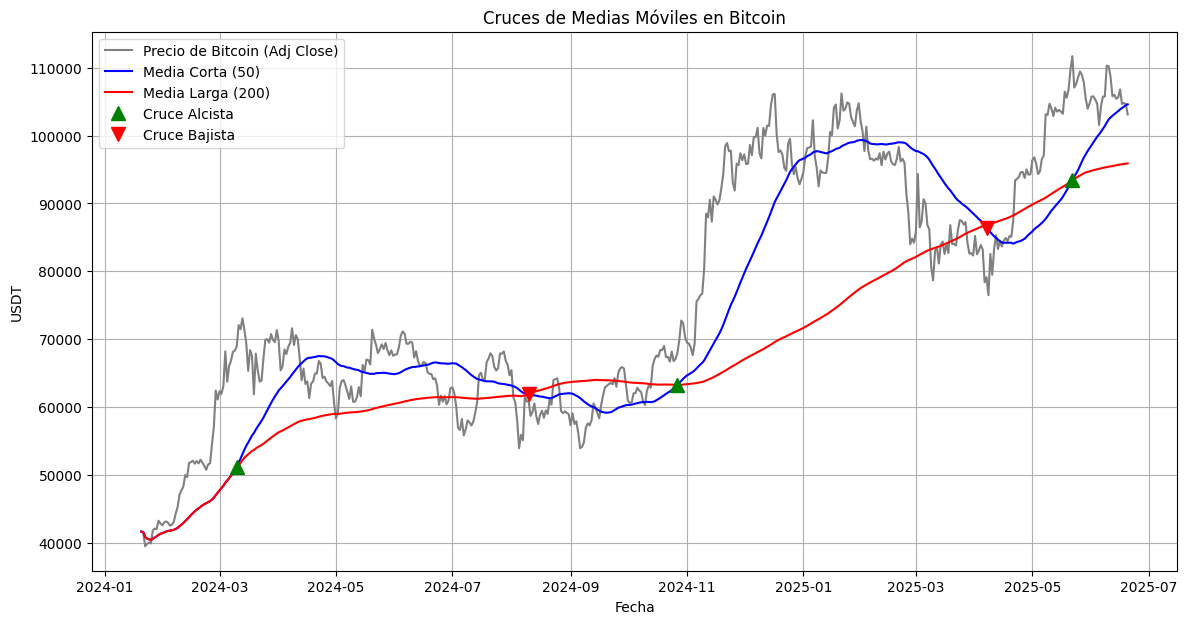

In [8]:
plt.figure(figsize=(14, 7))

plt.plot(señales['precio'], label='Precio de Bitcoin (Adj Close)', color='gray')

plt.plot(señales['media_corta'], label='Media Corta (50)', color='blue')
plt.plot(señales['media_larga'], label='Media Larga (200)', color='red')

plt.plot(señales[señales['cruce'] == 1.0].index, 
         señales['media_corta'][señales['cruce'] == 1.0], 
         '^', markersize=10, color='green', label='Cruce Alcista')

plt.plot(señales[señales['cruce'] == -1.0].index, 
         señales['media_corta'][señales['cruce'] == -1.0], 
         'v', markersize=10, color='red', label='Cruce Bajista')

plt.title('Cruces de Medias Móviles en Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('USDT')
plt.legend()
plt.grid()

# Conclusión

La estrategia de cruce de medias móviles es un enfoque clásico y robusto dentro del análisis técnico. En este notebook:

- Se identifican tendencias mediante dos medias móviles.
- Se generan señales claras y objetivas.
- Se visualizan los momentos de entrada y salida en el gráfico.
